## Chapter 2 - Filters, Contrast, Transformation and Morphology

Detect object shapes using edge detection filters, improve medical images with contrast enhancement and even enlarge pictures to five times its original size!

Apply morphology to make thresholding more accurate when segmenting images and go to the next level of processing images with Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from skimage import io

### 📒 1. Filtering

A technique or mathematical function that's applied for modifying or enhancing an image.

It can be used to emphasize or remove certain features like edges, **smoothing**, **sharpening** and **edge detection**.

<br>

Filtering is a neighborhood operation which involves processing an image in sections called blocks or neighborhoods, rather than processing the entire image at once.

In [2]:
# Show image
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [3]:
# Plot Comparison
def plot_comparison(original, filtered, title_filtered, title_original="original"):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)

  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title(title_original)
  ax1.axis("off")

  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis("off")

**1.1 Edge Detection**

This technique can be used to find the boundaries of objects within an image as well as segment and extract information.

It works by detecting discontinuities in brightness.

<br>

One of the most famous algorithm used for edge detection is sobel algorithm. It takes a 2-dimensional grayscale image as an input. So, in case of colored images, they must be first converted to grayscale images.

**1.2 Gaussian Smoothing**

Typically used to blur an image or to reduce noise. This also reduces contrast.

This is also used in other techniques like anti-aliasing filtering.

For gaussian smoothing `multichannel` parameter is set to true if the image is colored otherwise it is set to false.

### 📝 Edge detection

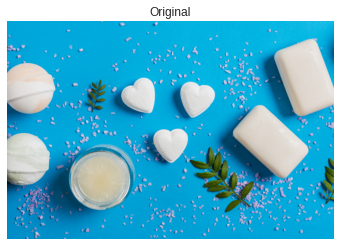

In [4]:
soaps_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/e40f9d1aec6b6394f636d3e96e5bc46a123f2545/soaps.jpg")
show_image(soaps_image, "Original")

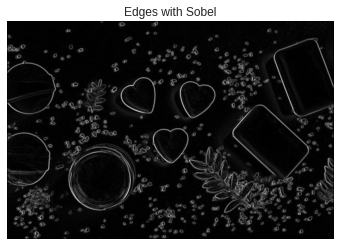

In [5]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

### 📝 Blurring to reduce noise

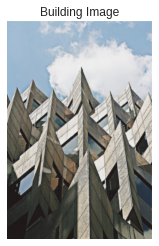

In [6]:
building_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/0782692803666712f80e62b7ca83e803861b6ed6/toa-sharp-def-3.jpg")
show_image(building_image, "Building Image")

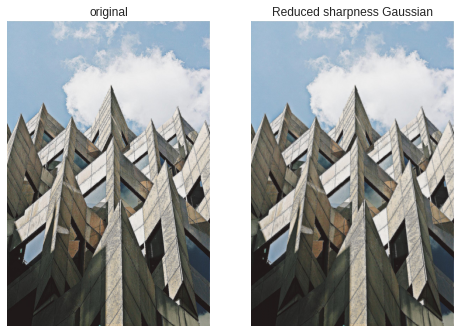

In [7]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
plot_comparison(building_image, gaussian_image, "Reduced sharpness Gaussian");

---

### 📒 2. Contrast Enhancement

The contrast of an image can be seen as the measure of its dynamic range or the spread of its histogram.

An image of low contrast has small difference between its dark and light pixel values. It is usually skewed to the right (mostly light), to the left (mostly dark) or located around the middle (mostly gray)

<br>

Often medical images like X-ray can have low contrast making it hard to spot important details

<br>

**Enhance Contrast**
- <u>Contrast Stretching:</u> Stretch the histogram so that the full range of intensity values of the image is filled.
- <u>Histogram Equalization:</u> Spreads out the most frequent histogram intensity values using probability distribution.

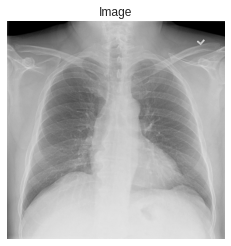

In [8]:
chest_xray_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/a0abe7fb876883411f306561c000e6cdecfe4e91/contrast_00000109_005.png")
show_image(chest_xray_image);

In [9]:
contrast = np.max(chest_xray_image) - np.min(chest_xray_image)
contrast

172

**2.1 Histogram Equalization**
- <u>Standard histogram equalization:</u> Spreads out the most frequent intensity values. Takes the global histogram of the image.
- <u>Adaptive histogram equalization:</u> Computes several histograms each corresponding to a distinct part of the image, and uses them to redistribute the lightness values of the image histogram.
- <u>Contrast limited adaptive histogram equalization:</u> Developed to prevent over-amplification of noise that adaptive equalization can give rist to. Operates on small regions called tiles or neighborhoods

### 📝 Medical images

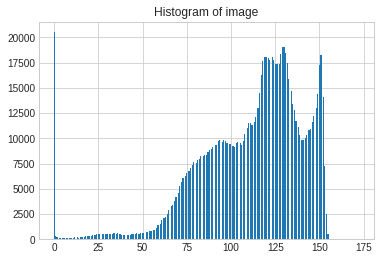

In [10]:
# Import the required module
from skimage import exposure

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

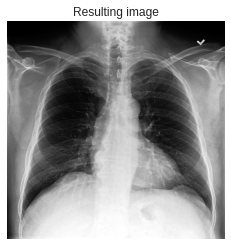

In [11]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

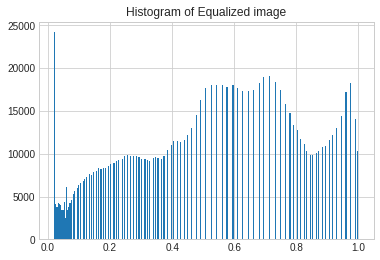

In [12]:
plt.title('Histogram of Equalized image')
plt.hist(xray_image_eq.ravel(), bins=256)
plt.show()

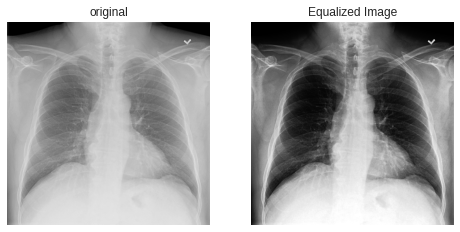

In [13]:
plot_comparison(chest_xray_image, xray_image_eq, "Equalized Image")

### 📝 Aerial image

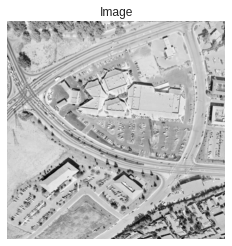

In [14]:
image_aerial = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/bcdab87fe0975f4451869ead252972396da2d83b/5.2.09.png")
show_image(image_aerial)

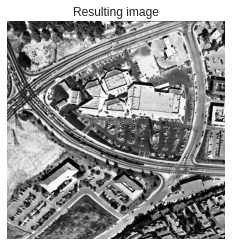

In [15]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

### 📝 Let's add some impact and contrast

Make images dramatic

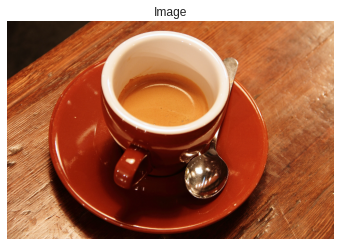

In [16]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

show_image(original_image)

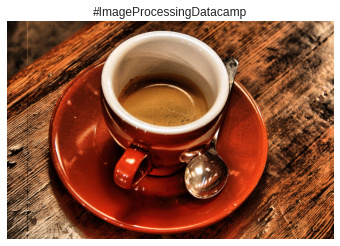

In [17]:
# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

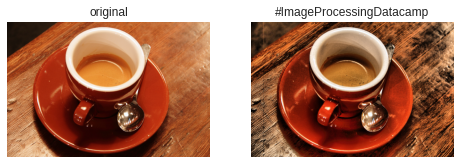

In [18]:
plot_comparison(original_image, adapthist_eq_image, "#ImageProcessingDatacamp")

---

### 📒 3. Transformations

Why transform images:
- Preparing images for classification models
- Optimization and compression of images
- Save images with same proportion

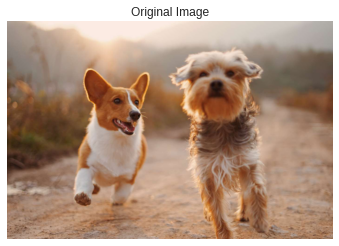

In [19]:
image = io.imread("https://www.canagan.co.uk/media/gene-cms/d/o/dogs.jpg")
show_image(image, "Original Image")

**Rotate**

In [20]:
from skimage.transform import rotate

# Rotate image 90 deg clockwise (right)
rotated_image_right = rotate(image, -90)

# Rotate image 90 deg anti clockwise (left)
rotated_image_left = rotate(image, 90)

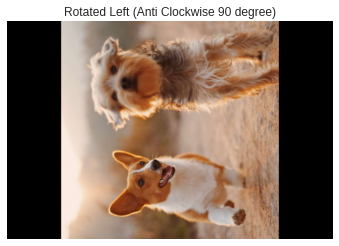

In [21]:
show_image(rotated_image_left, "Rotated Left (Anti Clockwise 90 degree)")

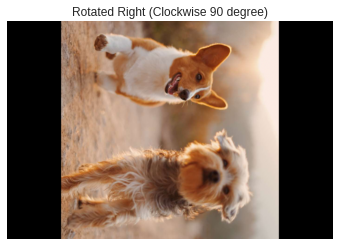

In [22]:
show_image(rotated_image_right, "Rotated Right (Clockwise 90 degree)")

**Rescale**

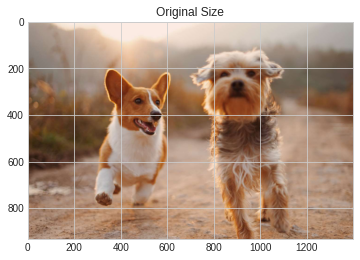

In [23]:
plt.imshow(image)
plt.title("Original Size");

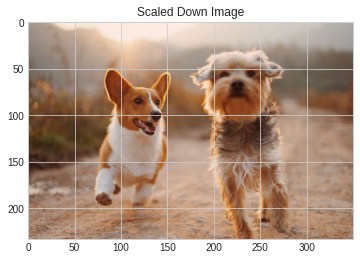

In [24]:
from skimage.transform import rescale

# Rescale the image to be 4 times smaller
image_rescaled_down = rescale(image, 1/4, anti_aliasing=False, multichannel=True)

plt.imshow(image_rescaled_down)
plt.title("Scaled Down Image");

**Aliasing** is a pattern or a rippling effect.

Aliasing makes the image looks like it has waves or ripples radiating from a certain portion. This happens because the pixelation of the image is poor.

In [25]:
image_aliasing_false = rescale(image, 1/15, anti_aliasing=False, multichannel=True)
image_aliasing_true = rescale(image, 1/15, anti_aliasing=True, multichannel=True)

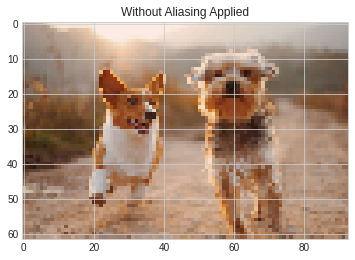

In [26]:
plt.imshow(image_aliasing_false)
plt.title("Without Aliasing Applied");

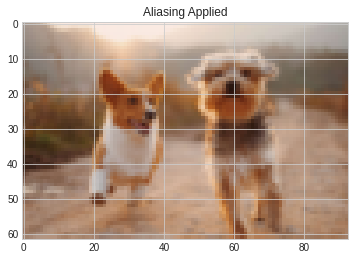

In [27]:
plt.imshow(image_aliasing_true)
plt.title("Aliasing Applied");

**Resize**

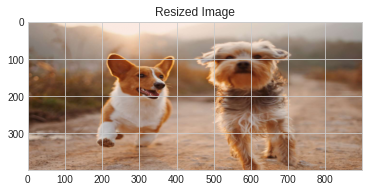

In [28]:
from skimage.transform import resize

height = 400
width = 900

image_resized = resize(image, (height, width), anti_aliasing=True)

plt.imshow(image_resized)
plt.title("Resized Image");

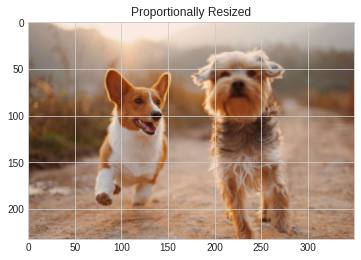

In [29]:
# Resizing proportionally 

height = int(image.shape[0] / 4)
width = int(image.shape[1] / 4)

image_resized_proportionally = resize(image, (height, width), anti_aliasing=True)

plt.imshow(image_resized_proportionally)
plt.title("Proportionally Resized");